In [65]:
# %%time ## 현재 사용되는 자료의 인코딩 문제로 한글표현이 잘 안됨.(패킷이 정확한 길이로 나뉘어야되서 특수한 인코딩을 사용하는듯 보임)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#현재는 같은 달의 데이터정제만 가능
def rawToDataFrame(path_dir, from_date, to_date, cdt = []):           
    # Raw파일의 디렉토리와 mmdd날짜정보, 찾기조건을 받아서 데이터프레임으로 만들어 내보내주는 함수
    dtls = os.listdir(path_dir)
    dtls.sort() # 날짜순 나열
    all_data = []
    print("===== 디렉토리 raw데이터 정보 =====\n",pd.DataFrame(dtls)[0])
    print("\n※--필터링조건 :",cdt)
    
    for d in range(int(from_date),int(to_date)+1):      #----------같은달 내에 날짜지정가능

        if len(str(d)) == 3 : date = "0"+str(d) #---날짜 전처리
        else : date = str(d)
            
        if "sise2local.ALL_CMDT."+date in dtls :       #----------해당 데이터파일이 있는경우 읽어오기
            data_path = path_dir+"sise2local.ALL_CMDT."+date #----읽어올 파일 경로 생성
            print("=== Raw데이터 변환중 :",data_path)
            with open(data_path, "rt", encoding='iso-8859-1') as f:
                for i in range(1000): #-------- ★ 1000으로 제한이 걸려있으나 차후 수정해야됨
                    t = f.readline()[17:]
                    print("  └───",i, "번째 정보 :", t[0:5],t[408:411],t[454:457], end=" || ")
                    if t[0:5]==cdt[0] and t[408:411]==cdt[1] and t[454:457]==cdt[2]: #★★필요한 정보만 찾는 구문
                        product_ID = t[18:30]
                        print('product_ID = ',product_ID)
                        break  #★★★★★★일단 1번째자료만 로딩하기로 되어있음.
                s = f.readlines()
            #1.조건에 충족하는 틱정보만 골라내기
            #2.index별로 자료분리
            #순서 : 날짜, 체결시각, 현재가격, 체결수량, 매도1호가, 매수1호가, 최종매도매수, 총잔량매도, 총잔량매수
            #위의 2단계를 한방에 정리해서 시간단축(list comprehension구문임)
            ls1 = [[date,row[:17],int(row[40:48]),int(row[48:54]),row[243:251],row[161:169],row[152:153],row[235:242],row[153:160]]
                   for row in s if (product_ID == row[22:34]) and (row[17:22] == 'G7016' )]

            for row in ls1: #-----각 파일별 데이터 순차합산
                all_data.append(row)
            
                   
    result = pd.DataFrame(all_data,columns=["날짜","체결시각","현재가격","체결수량","매도1호가","매수1호가","최종매도매수","총잔량매도","총잔량매수"])        
    return result



s=[]

#raw파일 디렉토리 경로
path_dir = "D:/FinanceData_raw/raw_data_set/"
           
#조건 : 초기코드(리스트형태가능), 종목, ??뭐였지?
cond = ['A0016','BM3','001']           
           
result = rawToDataFrame(path_dir, "0201", "0230", cond)       
    
result


===== 디렉토리 raw데이터 정보 =====
 0     sise2local.ALL_CMDT.0201
1     sise2local.ALL_CMDT.0202
2     sise2local.ALL_CMDT.0205
3     sise2local.ALL_CMDT.0206
4     sise2local.ALL_CMDT.0207
5     sise2local.ALL_CMDT.0208
6     sise2local.ALL_CMDT.0209
7     sise2local.ALL_CMDT.0212
8     sise2local.ALL_CMDT.0213
9     sise2local.ALL_CMDT.0214
10    sise2local.ALL_CMDT.0219
11    sise2local.ALL_CMDT.0220
12    sise2local.ALL_CMDT.0221
13    sise2local.ALL_CMDT.0222
14    sise2local.ALL_CMDT.0223
15    sise2local.ALL_CMDT.0226
16    sise2local.ALL_CMDT.0227
17    sise2local.ALL_CMDT.0228
Name: 0, dtype: object

※--필터링조건 : ['A0016', 'BM3', '001']
=== Raw데이터 변환중 : D:/FinanceData_raw/raw_data_set/sise2local.ALL_CMDT.0201
  └─── 0 번째 정보 : A0016 BM3 001 || product_ID =  KR4165N30007
=== Raw데이터 변환중 : D:/FinanceData_raw/raw_data_set/sise2local.ALL_CMDT.0202
  └─── 0 번째 정보 : A0016 BM3 001 || product_ID =  KR4165N30007
=== Raw데이터 변환중 : D:/FinanceData_raw/raw_data_set/sise2local.ALL_CMDT.0205
  └─── 0 번째

---
# 그래프화

In [20]:
#체결수량 50이상만 보기
# result[result['매도1호가']!=''].reset_index()

In [47]:
%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정(맑은고딕)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf",size=10,weight=True).get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

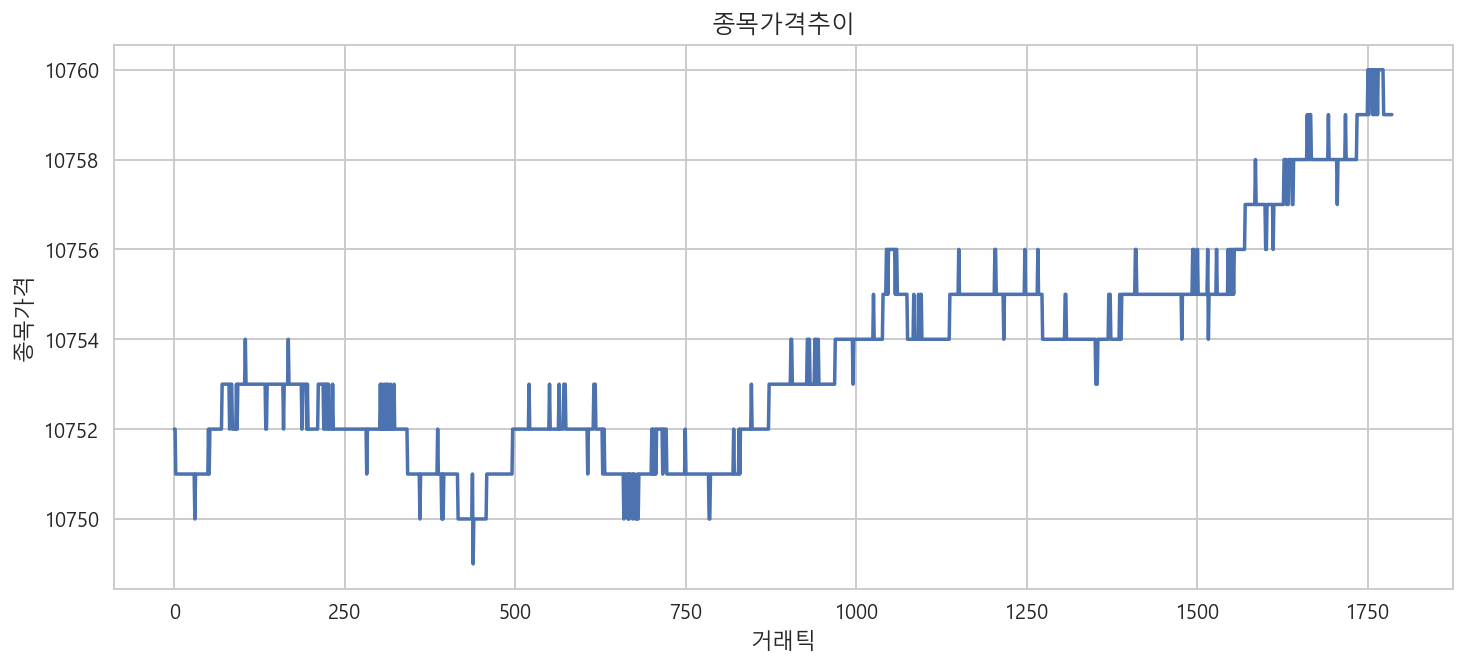

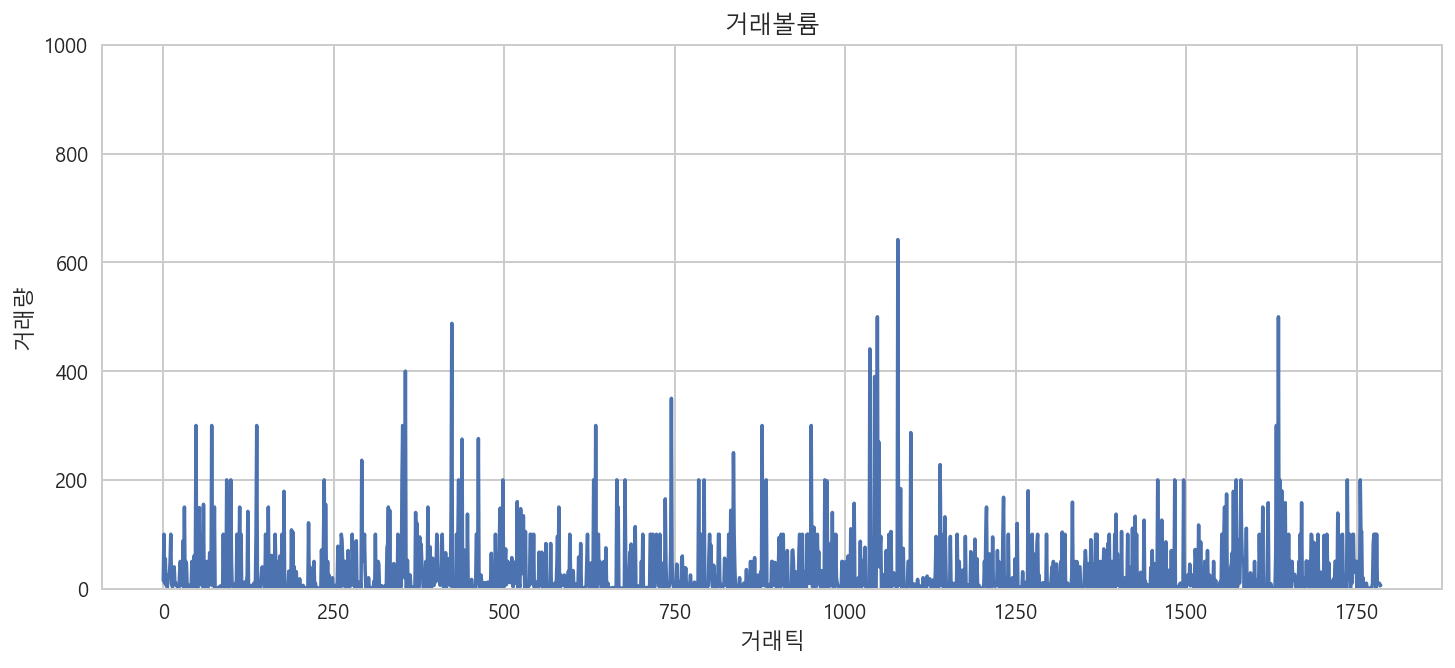

In [48]:
#종목가격,볼륨 차트

plt.figure(figsize=(12,5))
plt.plot(result['현재가격'])
plt.title('종목가격추이')
plt.xlabel('거래틱')
plt.ylabel('종목가격')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(result['체결수량'])
plt.title('거래볼륨')
plt.xlabel('거래틱')
plt.ylabel('거래량')
plt.ylim(0,1000)
plt.show()

In [14]:
# 코드길이재기, 코드 자르기 연습
a = '[09:03:01-204059]G7016KR4175N20007079G1 0010810000000140090301190000000000000000 00108150 00108230 00108100 0010811000054080000584893110000000000000000010003141 00108100000529 00108090000107 00108080000185 00108070000059 001080600001470002292 '
print(len(a))
b = '[09:03:01-204059]G7016KR4175N20007079G1 0010810000000140090301190000000000000000 00108150 00108230 00108100 0010811000054080000584893110000000000000000010003141 00108100000529 00108090000107 00108080000185 00108070000059 001080600001470002292 00108110000071 00108120000286 00108130000276 00108140000070 0010815000024300267002300140012000800110026100080018001600110019 00109180 00107020'
b[161:169]

243


'00108100'

#### 코드예제
[09:03:01-204059]G7016KR4175N20007079G1 0010810000000140090301190000000000000000 00108150 00108230 00108100 0010811000054080000584893110000000000000000010003141 00108100000529 00108090000107 00108080000185 00108070000059 001080600001470002292 00108110000071 00108120000286 00108130000276 00108140000070 0010815000024300267002300140012000800110026100080018001600110019 00109180 00107020